# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$ 

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

## Библиотеки


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках. 

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

## Задание 3.1

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [ ]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек 
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test

In [ ]:
X, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


### Реализуйте настройку w и b с помощью рассмотренного выше метода наименьших квадратов.

In [ ]:
#настройка моей модели
def need_x(X):
  x0 = np.ones((X.shape[0], 1))
  x = np.hstack((X, x0))
  return x

def MNK(X, y):
  x = np.array(need_x(X))
  w = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
  return w

w, b = MNK(X_train, y_train)
print('Train w: ', w)
print('Train b: ', b)

Train w:  9.553832882059577
Train b:  -7.839893861945111


In [ ]:
#sklearn
model = LinearRegression().fit(X_train, y_train)  #обучение модели
print(model.coef_, model.intercept_)

[9.55383288] -7.839893861945111


### Найдите значения метрик MSE и MAE. Сравните с результатами из sklear

In [ ]:
#тренировочные данные
y_predicted_my_train = X_train.dot(w) + b 
y_predicted_my_test = X_test.dot(w) + b 
y_train_predicted_sklearn = model.predict(X_train)
y_test_predicted_sklearn = model.predict(X_test)

print('Train my MSE: ', mean_squared_error(y_train, y_predicted_my_train))
print('Train sklearn MSE: ', mean_squared_error(y_train, y_train_predicted_sklearn))
print('Train my MAE: ', mean_absolute_error(y_train, y_predicted_my_train))
print('Train sklearn MAE: ', mean_absolute_error(y_train, y_train_predicted_sklearn))

Train my MSE:  98.36244548911543
Train sklearn MSE:  98.36244548911546
Train my MAE:  8.084029639144463
Train sklearn MAE:  8.084029639144465


In [ ]:
#тестовые
print('Test my MSE: ', mean_squared_error(y_test, y_predicted_my_test))
print('Test sklearn MSE: ', mean_squared_error(y_test, y_test_predicted_sklearn))
print('Test my MAE: ', mean_absolute_error(y_test, y_predicted_my_test))
print('Test sklearn MAE: ', mean_absolute_error(y_test, y_test_predicted_sklearn))

Test my MSE:  106.77772626178471
Test sklearn MSE:  106.77772626178475
Test my MAE:  7.9966602788745185
Test sklearn MAE:  7.996660278874518


### Вывод

Результаты идентичны между собой

## Задание 3.2


Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

In [ ]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

### Попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.

In [ ]:
x_train = data['x_train'][:, np.newaxis]
w,b = MNK(x_train,data['y_train'])
w, b

(-0.26429386036375163, 1.8430669464102476)

### Найдите значения метрик MSE и MAE

In [ ]:
y_predicted = x_train.dot(w) + b 

print('Train MSE: ', mean_squared_error(data['y_train'], y_predicted))
print('Train MAE: ', mean_absolute_error(data['y_train'], y_predicted))

Train MSE:  0.30494637357110244
Train MAE:  0.4688954002163805


Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \hat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$ 

## Визуализация для проверки

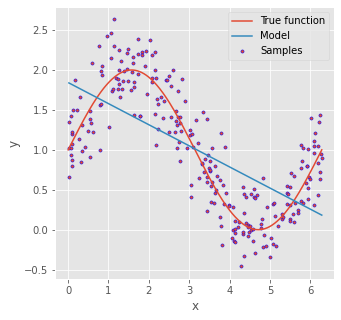

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(data['support'], data['values'], label="True function")
plt.plot(data['x_train'], y_predicted, label="Model")
plt.scatter(x_train, data['y_train'], edgecolor='b', s=10, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="best")

## Задание 3.3

### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней. 

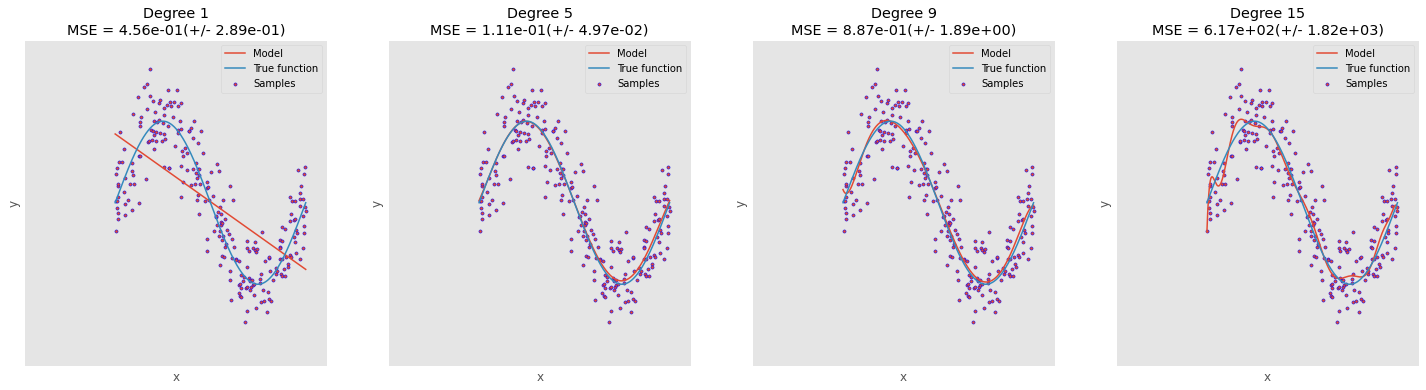

In [ ]:
degrees = [1, 5, 9, 15]
plt.figure(figsize=(25, 6))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    pf = PolynomialFeatures(degree=degrees[i], include_bias=False)
    lr = LinearRegression()
    pipeline = Pipeline([("polynomial_features", pf),
                         ("linear_regression", lr)])
    pipeline.fit(x_train, data['y_train'])

    scores = cross_val_score(pipeline, x_train, data['y_train'],
                             scoring="neg_mean_squared_error", cv=10)

    plt.plot(data['support'], pipeline.predict(data['support'][:, np.newaxis]), label="Model")
    plt.plot(data['support'], data['values'], label="True function")
    plt.scatter(x_train, data['y_train'], edgecolor='b', s=10, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((-3, 7))
    plt.ylim((-1, 3))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

### Полином какой степени подходит больше других? Почему?

Больше всего подходит полином 5 степени, так как он наиболее приближенно напоминает реальную функцию и имеет наименьший параметр MSE

Степень 1 - underfitting, очень простая модель

Степень 9, 15 - overfitting, очень сложная модель

# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [ ]:
house_data = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
X = pd.DataFrame(house_data['data'], columns=house_data['feature_names'])
y = house_data['target']
X.shape

(506, 13)

## Задание 3.4

### Оставьте в наборе данных только 7 наиболее значимых признаков

<BarContainer object of 13 artists>

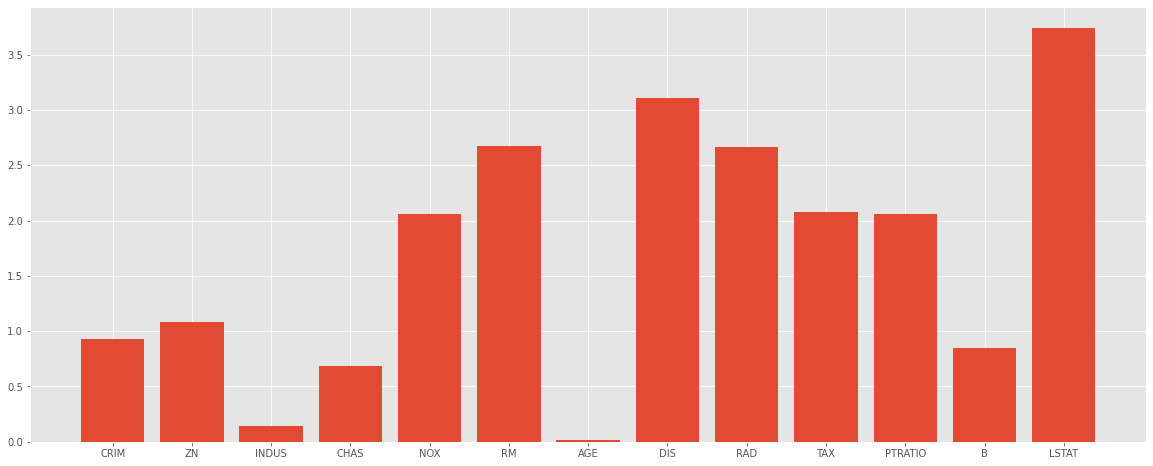

In [ ]:
#скейлинг данных
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

#обучение модели
linear_model = LinearRegression().fit(X_sc, y)

#проверка признаков
plt.figure(figsize=(20, 8))
plt.bar(X.columns, abs(linear_model.coef_))

In [ ]:
#отбор признаков
X_new = X.loc[:, ['LSTAT', 'DIS', 'RM', 'RAD', 'PTRATIO', 'NOX', 'TAX']]
X_new.head()

,LSTAT,DIS,RM,RAD,PTRATIO,NOX,TAX
0,4.98,4.0900,6.575,1.0,15.3,0.538,296.0
1,9.14,4.9671,6.421,2.0,17.8,0.469,242.0
2,4.03,4.9671,7.185,2.0,17.8,0.469,242.0
3,2.94,6.0622,6.998,3.0,18.7,0.458,222.0
4,5.33,6.0622,7.147,3.0,18.7,0.458,222.0


### Настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(house_data.data, house_data.target, test_size = 0.7, random_state = 0)

X_train_tr, X_test_tr, y_train_tr, y_test_tr = train_test_split(X_new.to_numpy(), house_data.target, train_size = 0.7, random_state = 0)

#настройка модели для усеченного датасета
linear_model_truncated = LinearRegression().fit(X_train_tr, y_train_tr) 

#настройка модели для полного датасета
linear_model_full = LinearRegression().fit(X_train, y_train) 

#MSE и MAE
y_pred_trun = linear_model_truncated.predict(X_test_tr)
y_pred_full = linear_model_full.predict(X_test)

print('Truncated MSE: ', mean_squared_error(y_test_tr, y_pred_trun))
print('Full MSE: ', mean_squared_error(y_test, y_pred_full))
print('Truncated MAE: ', mean_absolute_error(y_test_tr, y_pred_trun))
print('Full MAE: ', mean_absolute_error(y_test, y_pred_full))

Truncated MSE:  29.855053545070955
Full MSE:  25.9182394047958
Truncated MAE:  3.8391392570962104
Full MAE:  3.6316112227167445
